Analysis 2. Turns out the TAZ that contains SFO (San Francisco International Airport) is the TAZ that
generates the most trips. find the most popular “deptaz” and save the taz id as sfo_taz. Then split the
dataset into two groups of trips that originated or ended at SFO, and the rest of the trips. What can you say
about these two groups of data? How different they are? (your answers need to be quantitative, based on
some measures or metrics)

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
taxi = Table().read_table("SF_taxi_data.csv")

In [3]:
refined_data = taxi.where("num", 1).where("fare ($)", are.above(3.5))

In [4]:
refined_data

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
0,9/1/12 0:11,9/1/12 0:20,13.2,1,-122.414,37.8027,-122.421,37.7854,38,30,1.98084
1,9/1/12 0:23,9/1/12 0:31,10.65,1,-122.42,37.7861,-122.435,37.7622,30,94,2.40224
2,9/1/12 0:45,9/1/12 0:49,9,1,-122.415,37.7747,-122.408,37.7826,10,11,0.479348
4,9/1/12 1:09,9/1/12 1:13,7.35,1,-122.43,37.7978,-122.418,37.789,45,32,1.03807
5,9/1/12 1:40,9/1/12 1:52,11.75,1,-122.433,37.7841,-122.411,37.787,77,7,0.960851
6,9/1/12 2:49,9/1/12 2:51,5.15,1,-122.409,37.7856,-122.412,37.791,7,29,0.414315
7,9/1/12 3:29,9/1/12 3:47,43.65,1,-122.403,37.7927,-122.386,37.6181,2,239,14.5105
8,9/1/12 0:33,9/1/12 0:57,46.75,1,-122.387,37.6174,-122.407,37.7889,239,5,14.2747
9,9/1/12 4:39,9/1/12 4:43,6.25,1,-122.422,37.7977,-122.418,37.789,34,31,0.685312
10,9/1/12 1:59,9/1/12 2:05,9.55,1,-122.418,37.791,-122.429,37.7724,32,81,1.59807


In [6]:
sfo_taz= refined_data.group("deptaz").column(0).item(0)
sfo_taz

0

In [39]:
sf1 = refined_data.where("deptaz", are.equal_to(sfo_taz)).where("arrtaz", are.not_equal_to(sfo_taz))
sf2 = refined_data.where("arrtaz", are.equal_to(sfo_taz))
appended = sf1.append(sf2)
appended

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
126,9/1/12 1:35,9/1/12 1:43,11.75,1,-122.408,37.7877,-122.404,37.7607,0,114,2.6232
147,9/1/12 4:03,9/1/12 4:08,7.35,1,-122.393,37.7935,-122.41,37.7874,0,7,1.24485
225,9/1/12 10:21,9/1/12 10:40,42,1,-122.408,37.7876,-122.39,37.6146,0,239,14.1623
246,9/1/12 6:47,9/1/12 7:01,42.05,1,-122.422,37.7499,-122.387,37.6178,0,239,11.7844
293,9/1/12 2:38,9/1/12 3:00,23.85,1,-122.454,37.7695,-122.417,37.7579,0,101,2.47107
305,9/1/12 3:24,9/1/12 3:34,13.4,1,-122.422,37.76,-122.415,37.7941,0,28,2.68639
493,9/1/12 2:23,9/1/12 2:40,20,1,-122.405,37.7949,-122.466,37.7566,0,174,5.16775
508,9/1/12 15:21,9/1/12 15:44,28.4,1,-122.475,37.8076,-122.418,37.7507,0,100,6.42459
525,9/1/12 8:35,9/1/12 8:43,11.55,1,-122.408,37.7879,-122.419,37.8073,0,41,1.34779
541,9/1/12 13:20,9/1/12 13:29,8.45,1,-122.408,37.788,-122.4,37.7904,0,4,0.526979


In [42]:
not_sf = refined_data.where("deptaz", are.not_equal_to(sfo_taz)).where("arrtaz", are.not_equal_to(sfo_taz))
not_sf

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
0,9/1/12 0:11,9/1/12 0:20,13.2,1,-122.414,37.8027,-122.421,37.7854,38,30,1.98084
1,9/1/12 0:23,9/1/12 0:31,10.65,1,-122.42,37.7861,-122.435,37.7622,30,94,2.40224
2,9/1/12 0:45,9/1/12 0:49,9,1,-122.415,37.7747,-122.408,37.7826,10,11,0.479348
4,9/1/12 1:09,9/1/12 1:13,7.35,1,-122.43,37.7978,-122.418,37.789,45,32,1.03807
5,9/1/12 1:40,9/1/12 1:52,11.75,1,-122.433,37.7841,-122.411,37.787,77,7,0.960851
6,9/1/12 2:49,9/1/12 2:51,5.15,1,-122.409,37.7856,-122.412,37.791,7,29,0.414315
7,9/1/12 3:29,9/1/12 3:47,43.65,1,-122.403,37.7927,-122.386,37.6181,2,239,14.5105
8,9/1/12 0:33,9/1/12 0:57,46.75,1,-122.387,37.6174,-122.407,37.7889,239,5,14.2747
9,9/1/12 4:39,9/1/12 4:43,6.25,1,-122.422,37.7977,-122.418,37.789,34,31,0.685312
10,9/1/12 1:59,9/1/12 2:05,9.55,1,-122.418,37.791,-122.429,37.7724,32,81,1.59807


In [44]:
(appended.num_rows + not_sf.num_rows) == refined_data.num_rows

True

In [80]:
def prediction_lin_r(table, col, slope, intercept):
    x= table.column(col) 
    predictions = slope * x + intercept
    return predictions

In [81]:
x = appended["dist (miles)"]
y = appended["fare ($)"]
theta1 = np.sum(x*(y-np.mean(y)))/np.sum(x*(x-np.mean(x)))
theta2 = -theta1*np.mean(x) + np.mean(y)
theta1, theta2

(3.3664289492171582, 5.6245348288279384)

In [82]:
prediction = prediction_lin_r(appended, "dist (miles)",3.3664289492171582, 5.6245348288279384)
truth = appended.column("fare ($)")
error = truth - prediction

def rmse(error):
    return np.sqrt(np.mean((error)**2))

rmse(error)

4.8137816598425927

In [83]:
append_predict = appended.select("dist (miles)", "fare ($)").with_column("Prediction", prediction)
append_predict

dist (miles),fare ($),Prediction
2.6232,11.75,14.4554
1.24485,7.35,9.81525
14.1623,42,53.3009
11.7844,42.05,45.2958
2.47107,23.85,13.9432
2.68639,13.4,14.6681
5.16775,20,23.0214
6.42459,28.4,27.2524
1.34779,11.55,10.1618
0.526979,8.45,7.39857


.

In [84]:
x = not_sf["dist (miles)"]
y = not_sf["fare ($)"]
theta1 = np.sum(x*(y-np.mean(y)))/np.sum(x*(x-np.mean(x)))
theta2 = -theta1*np.mean(x) + np.mean(y)
theta1, theta2

(3.333535544306014, 5.0539072219542511)

In [85]:
prediction = prediction_lin_r(not_sf, "dist (miles)",3.333535544306014, 5.0539072219542511)
truth = not_sf.column("fare ($)")
error = truth - prediction

rmse(error)

5.0507726184763566

In [86]:
not_sf_predict = not_sf.select("dist (miles)", "fare ($)").with_column("Prediction", prediction)
not_sf_predict

dist (miles),fare ($),Prediction
1.98084,13.2,11.6571
2.40224,10.65,13.0619
0.479348,9,6.65183
1.03807,7.35,8.51435
0.960851,11.75,8.25694
0.414315,5.15,6.43504
14.5105,43.65,53.4253
14.2747,46.75,52.6391
0.685312,6.25,7.33842
1.59807,9.55,10.3811


In [87]:
final_table = append_predict.append(not_sf_predict)
final_table

dist (miles),fare ($),Prediction
2.6232,11.75,14.4554
1.24485,7.35,9.81525
14.1623,42,53.3009
11.7844,42.05,45.2958
2.47107,23.85,13.9432
2.68639,13.4,14.6681
5.16775,20,23.0214
6.42459,28.4,27.2524
1.34779,11.55,10.1618
0.526979,8.45,7.39857


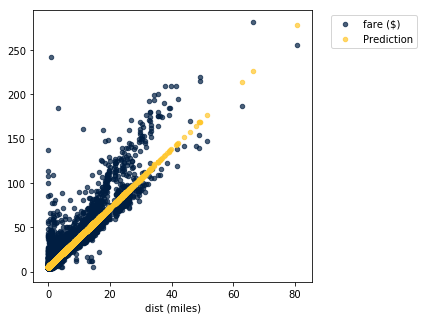

In [90]:
final_table.scatter(0)

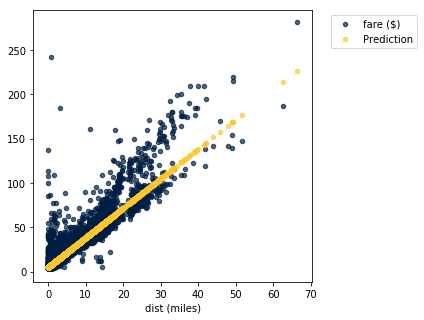

In [91]:
not_sf_predict.scatter(0)

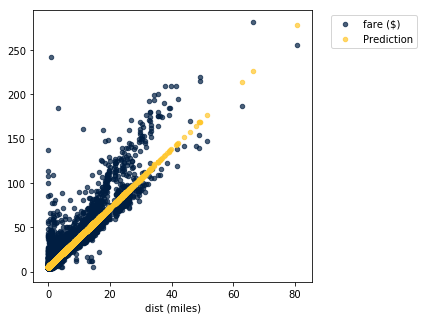

In [92]:
append_predict.scatter(0)